# Clinical Data - Modeling & Evaluation
This notebook trains and evaluates predictive models for clinical response.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc


In [2]:
print(f"Notebook is running from: {os.getcwd()}")

# Add parent directory to path
parent_dir = os.path.abspath('..')
sys.path.insert(0, parent_dir)
print(f"Added to path: {parent_dir}")

# Change working directory to parent
os.chdir(parent_dir)
print(f"Changed working directory to: {os.getcwd()}")

df= pd.read_csv("data/imputed_data.csv")
df.head()

Notebook is running from: c:\Users\USER\Downloads\Tech assessment\notebooks
Added to path: c:\Users\USER\Downloads\Tech assessment
Changed working directory to: c:\Users\USER\Downloads\Tech assessment


,ID,DOSE,AGE,WT,SEX,CMAX,AUC,RESPONSE
0,PT0001,200.0,62.450712,86.354829,1.0,26.249404,251.322910,1.0
1,PT0002,400.0,52.926035,61.167520,0.0,87.865616,598.853233,1.0
2,PT0003,200.0,64.715328,88.044089,0.0,33.001143,274.196583,1.0
3,PT0004,100.0,77.845448,95.334568,0.0,6.152791,49.149857,0.0
4,PT0005,400.0,51.487699,81.201524,0.0,37.452883,294.004531,1.0


In [3]:
print(f"Missing values in each column:\n{df.isnull().sum()}")

Missing values in each column:
ID          0
DOSE        0
AGE         0
WT          0
SEX         0
CMAX        0
AUC         0
RESPONSE    0
dtype: int64


In [4]:

print(f"Data Frame Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        480 non-null    object 
 1   DOSE      480 non-null    float64
 2   AGE       480 non-null    float64
 3   WT        480 non-null    float64
 4   SEX       480 non-null    float64
 5   CMAX      480 non-null    float64
 6   AUC       480 non-null    float64
 7   RESPONSE  480 non-null    float64
dtypes: float64(7), object(1)
memory usage: 30.1+ KB
Data Frame Info: None


In [5]:

print(f" Number of duplicate rows: {df.duplicated().sum()}")

 Number of duplicate rows: 0


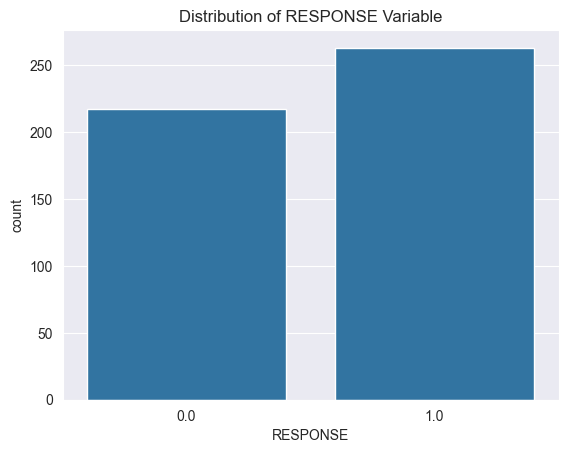

In [6]:
# Check target distribution
sns.countplot(x="RESPONSE", data=df)
plt.title("Distribution of RESPONSE Variable")
plt.show()

In [7]:
# defining the X and the y variables, 
X = df.drop(columns=["RESPONSE","ID"], axis=1)
y = df["RESPONSE"]

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (384, 6), Testing set size: (96, 6)


In [9]:
#1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)
y_pred_lr

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

In [10]:
print(classification_report(y_test, y_pred_lr, target_names=['No Response', 'Response']))

              precision    recall  f1-score   support

 No Response       0.85      0.91      0.88        43
    Response       0.92      0.87      0.89        53

    accuracy                           0.89        96
   macro avg       0.88      0.89      0.88        96
weighted avg       0.89      0.89      0.89        96



In [11]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['No Response', 'Response']))

              precision    recall  f1-score   support

 No Response       0.86      0.86      0.86        43
    Response       0.89      0.89      0.89        53

    accuracy                           0.88        96
   macro avg       0.87      0.87      0.87        96
weighted avg       0.88      0.88      0.88        96



In [13]:
joblib.dump(logistic_model, 'trained_models/logistic_regression_model.joblib')
print("Logistic Regression model saved to 'trained_models/logistic_regression_model.joblib'")

Logistic Regression model saved to 'trained_models/logistic_regression_model.joblib'


In [14]:
joblib.dump(rf_model, 'trained_models/random_forest_model.joblib')
print("Random Forest model saved to 'trained_models/random_forest_model.joblib'")

Random Forest model saved to 'trained_models/random_forest_model.joblib'
